# 第6章　使用 `scikit-learn` 构建模型

## 实训1　使用 `sklearn` 处理 `wine` 和 `wine_quality` 数据集

1. 训练要点

    1. 掌握 `sklearn` 转换器的用法。
    2. 掌握训练集、测试集划分的方法。
    3. 掌握使用 `sklearn` 进行 `PCA` 降维的方法。

2. 需求说明

    &emsp;&emsp;`wine` 数据集和 `wine_quality` 数据集是两份和酒有关的数据集。 `wine` 数据集包含$3$种不同起源的葡萄酒的记录，共$178$条。其中，每个特征对应葡萄酒的每种化学成分，并且都属于连续型数据。通过化学分析可以推断葡萄酒的起源。
    
    &emsp;&emsp;`wine_quality` 数据集共有$4898$个观察值，$11$个输入特征和一个标签。其中，不同类的观察值数量不等，所有特征为连续型数据。通过就得各种化学成分，预测该葡萄酒的评分。

3. 实现思路集步骤

    1. 使用 `pandas` 库分别读取 `wine` 数据集和 `wine_quality` 数据集。
    2. 将 `wine` 数据集和 `wine_quality` 数据集的数据和标签拆分开。
    3. 将 `wine_quality` 数据集划分为训练集和测试集。
    4. 标准化 `wine` 数据集和 `wine_quality` 数据集。
    5. 对 `wine` 数据集和 `wine_quality` 数据集进行 `PCA` 降维。

In [1]:
# 读取数据集
import pandas
wine = pandas.read_csv('data/wine.csv', sep=',', encoding='gbk')
print('Wine数据集为：%s at %s' % (type(wine), hex(id(wine))))
wine_quality = pandas.read_csv('data/winequality.csv', sep=';', encoding='gbk')
print('Wine_quality数据集为：%s at %s' % (type(wine_quality), hex(id(wine_quality))))

Wine数据集为：<class 'pandas.core.frame.DataFrame'> at 0x12749db7848
Wine_quality数据集为：<class 'pandas.core.frame.DataFrame'> at 0x12749dd6048


In [2]:
# 拆分数据与标签
wine_data = wine.iloc[:, 1:]
print('Wine数据集数据大小为：', wine_data.shape)
wine_tags = wine.iloc[:, 0]
print('Wine数据集标签大小为：', wine_tags.shape)
wine_quality_data = wine_quality.iloc[:, :-1]
print('Wine_quality数据集数据大小为：', wine_quality_data.shape)
wine_quality_tags = wine_quality.iloc[:, -1]
print('Wine_quality数据集标签大小为：', wine_quality_tags.shape)

Wine数据集数据大小为： (178, 13)
Wine数据集标签大小为： (178,)
Wine_quality数据集数据大小为： (1599, 11)
Wine_quality数据集标签大小为： (1599,)


In [3]:
# 划分集合 
from sklearn.model_selection import train_test_split
(
    wine_quality_data_train, wine_quality_data_test,
    wine_quality_tags_train, wine_quality_tags_test
) = train_test_split(
    wine_quality_data, wine_quality_tags,
    test_size=0.2, random_state=0x6A24261B
)
print('Wine_quality训练集数据大小为：', wine_quality_data_train.shape)
print('Wine_quality训练集标签大小为：', wine_quality_tags_train.shape)
print('Wine_quality测试集数据大小为：', wine_quality_data_test.shape)
print('Wine_quality测试集标签大小为：', wine_quality_tags_test.shape)

Wine_quality训练集数据大小为： (1279, 11)
Wine_quality训练集标签大小为： (1279,)
Wine_quality测试集数据大小为： (320, 11)
Wine_quality测试集标签大小为： (320,)


In [4]:
# 数据标准化（标准差）
from sklearn.preprocessing import StandardScaler
wine_stdScaler = StandardScaler().fit(wine_data)
wine_std_data = wine_stdScaler.transform(wine_data)
print('Wine数据集标准差标准化后首行为：', wine_std_data[:5], sep='\n')
wine_quality_stdScaler = StandardScaler().fit(wine_quality_data)
wine_quality_std_data_train = wine_quality_stdScaler.transform(wine_quality_data_train)
print('Wine_quality训练集标准差标准化后首行为：', wine_quality_std_data_train[:5], sep='\n')
wine_quality_std_data_test = wine_quality_stdScaler.transform(wine_quality_data_test)
print('Wine_quality测试集标准差标准化后首行为：', wine_quality_std_data_test[:5], sep='\n')

Wine数据集标准差标准化后首行为：
[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]
Wine_quality训练集标准差标准化后首行为：
[[ 0.21852997  0.06804042 -0.05636026 -0.02753165  0.20262147 -0.84871559
  -0.47035959  0.45227172 -0.26638383 -0.34315421 -1.05411336]
 [

In [5]:
# PCA降维
from sklearn.decomposition import PCA
wine_pca_model = PCA(n_components=8).fit(wine_std_data)
wine_pca_data = wine_pca_model.transform(wine_std_data)
print('Wine数据集降维后的大小为：', wine_pca_data.shape)
wine_quality_pca_model = PCA(n_components=8).fit(wine_quality_std_data_train)
wine_quality_pca_train = wine_quality_pca_model.transform(wine_quality_std_data_train)
print('Wine_quality训练集降维后的大小为：', wine_quality_pca_train.shape)
wine_quality_pca_test = wine_quality_pca_model.transform(wine_quality_std_data_test)
print('Wine_quality测试集降维后的大小为：', wine_quality_pca_test.shape)

Wine数据集降维后的大小为： (178, 8)
Wine_quality训练集降维后的大小为： (1279, 8)
Wine_quality测试集降维后的大小为： (320, 8)


## 实训2　构建基于 `wine` 数据集的 `K-Means` 聚类模型

1. 训练要点

    1. 了解 `sklearn` 估计器的用法。
    2. 掌握聚类模型的构建方法。
    3. 掌握聚类模型的评估方法。

2. 需求说明

    &emsp;&emsp;`wine` 数据集的葡萄酒总共分为$3$种，通过将 `wine` 数据集的数据进行聚类，聚集为$3$个簇，能够实现葡萄酒的类别划分。

3. 实现思路及步骤

    1. 根据实训1的 `wine` 数据集处理的结果，构建聚类数目为$3$的 `K-Means` 模型。
    2. 对比真实标签和聚类标签求取 `FMI` 。
    3. 在聚类数目为$2\sim10$类时，确定最优聚类数目。
    4. 求取 `Calinski-Harabasz` 指数，确定最优聚类数目。

In [6]:
# K-Means聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(wine_std_data)
print('构建的K-Means模型为：', kmeans, sep='\n')

构建的K-Means模型为：
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


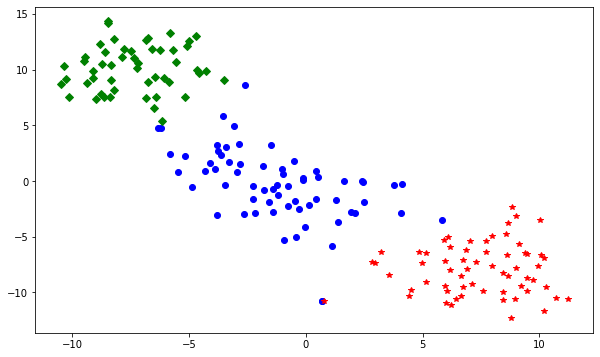

In [7]:
# 聚类结果可视化
%matplotlib inline
import pandas
from sklearn.manifold import TSNE
from matplotlib import pyplot
tsne = TSNE(
    n_components=2, init='random', random_state=0x6A24261B
).fit(wine_std_data)
frame = pandas.DataFrame(tsne.embedding_)
frame['labels'] = kmeans.labels_
frame_A = frame[frame['labels'] == 0]
frame_B = frame[frame['labels'] == 1]
frame_C = frame[frame['labels'] == 2]
figure = pyplot.figure(figsize=(10, 6))
pyplot.plot(
    frame_A[0], frame_A[1], 'bo',
    frame_B[0], frame_B[1], 'r*',
    frame_C[0], frame_C[1], 'gD'
)
pyplot.savefig('img/葡萄酒聚类结果.svg')
pyplot.show()

In [8]:
# 计算FMI
from sklearn.metrics import fowlkes_mallows_score
score = fowlkes_mallows_score(wine_tags, kmeans.labels_)
print('葡萄酒数据聚3类的FMI评价分值为：', score)

葡萄酒数据聚3类的FMI评价分值为： 0.9319080608075307


In [9]:
# FMI法确定最优聚类数目
best_clusters = 0
max_FMI = 0
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0x6A24261B).fit(wine_std_data)
    score = fowlkes_mallows_score(wine_tags, kmeans.labels_)
    if max_FMI < score:
        max_FMI = score
        best_clusters = i
print('葡萄酒数据的最优聚类数目为%d类' % best_clusters)

葡萄酒数据的最优聚类数目为3类


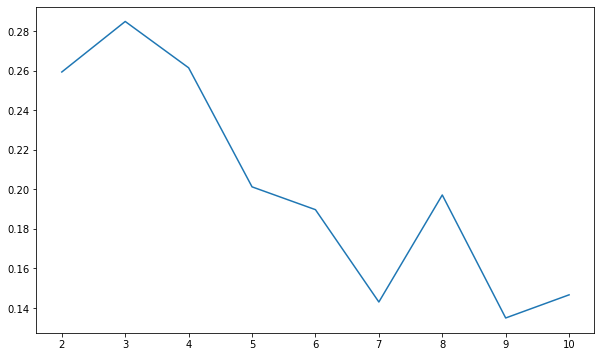

葡萄酒数据的最优聚类数目为3类


In [10]:
# 轮廓系数确定最优聚类数目
%matplotlib inline
from sklearn.metrics import silhouette_score
silhouetteScore = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0x6A24261B).fit(wine_std_data)
    score = silhouette_score(wine_std_data, kmeans.labels_)
    silhouetteScore.append(score)
pyplot.figure(figsize=(10, 6))
pyplot.plot(range(2, 11), silhouetteScore, linewidth=1.5, linestyle='-')
pyplot.savefig('img/葡萄酒轮廓系数评分.svg')
pyplot.show()
print('葡萄酒数据的最优聚类数目为%d类' % (silhouetteScore.index(max(silhouetteScore)) + 2))

In [11]:
# CHSZ指数确定最优聚类数目
from sklearn.metrics import calinski_harabasz_score
best_clusters = 0
max_CHSZ = 0
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0x6A24261B).fit(wine_std_data)
    score = calinski_harabasz_score(wine_std_data, kmeans.labels_)
    if max_CHSZ < score:
        max_CHSZ = score
        best_clusters = i
print('葡萄酒数据集最佳聚类数目为%d类' % best_clusters)

葡萄酒数据集最佳聚类数目为3类


## 实训4　构建基于 `wine_quality` 数据集的回归模型

1. 训练要点

    1. 熟练 `sklearn` 估计器的用法。
    2. 掌握回归模型的构建方法。
    3. 掌握回归模型的评价方法。

2. 需求说明

    &emsp;&emsp;`wine_quality` 数据集的葡萄酒评分在$1\sim10$之间，构建线性回归模型与梯度提升回归模型，训练 `wine_quality` 数据集的训练集数据，训练完成后预测测试集的葡萄酒评分。结合真实评分，评价构建的两个回归模型的好坏。

3. 实现思路及步骤

    1. 根据 `wine_quality` 数据集处理的结果，构建线性回归模型。
    2. 根据 `wine_quality` 数据集处理的结果，构建梯度提升回归模型。
    3. 结合真实评分和预测评分，计算均方误差、中值绝对误差、可解释方差值。
    4. 根据得分，判定模型的性能优劣。

In [12]:
# 构建线性回归模型
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(wine_quality_data_train, wine_quality_tags_train)
print('建立的线性回归模型为：', clf, sep='\n')

建立的线性回归模型为：
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [13]:
# 构建梯度提升回归模型
from sklearn.ensemble import GradientBoostingRegressor
GBR_wine_quality = GradientBoostingRegressor().fit(wine_quality_data_train, wine_quality_tags_train)
print('建立的梯度提升回归模型为：', GBR_wine_quality, sep='\n')

建立的梯度提升回归模型为：
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [14]:
# 预测评分
wine_quality_tags_pred_Linear = clf.predict(wine_quality_data_test)
wine_quality_tags_pred_GBR = GBR_wine_quality.predict(wine_quality_data_test)
# 评价模型
from sklearn.metrics import (
    explained_variance_score, mean_absolute_error, 
    mean_squared_error, median_absolute_error, r2_score
)
print(
    '线性回归模型的平均绝对误差为：',
    mean_absolute_error(wine_quality_tags_test, wine_quality_tags_pred_Linear)
)
print(
    '线性回归模型的均方误差为：',
    mean_squared_error(wine_quality_tags_test, wine_quality_tags_pred_Linear)
)
print(
    '线性回归模型的中值绝对误差为：',
    median_absolute_error(wine_quality_tags_test, wine_quality_tags_pred_Linear)
)
print(
    '线性回归模型的可解释方差值为：',
    explained_variance_score(wine_quality_tags_test, wine_quality_tags_pred_Linear)
)
print(
    '线性回归模型的R²值为：',
    r2_score(wine_quality_tags_test, wine_quality_tags_pred_Linear)
)
print(
    '梯度提升回归模型的平均绝对误差为：',
    mean_absolute_error(wine_quality_tags_test, wine_quality_tags_pred_GBR)
)
print(
    '梯度提升回归模型的均方误差为：',
    mean_squared_error(wine_quality_tags_test, wine_quality_tags_pred_GBR)
)
print(
    '梯度提升回归模型的中值绝对误差为：',
    median_absolute_error(wine_quality_tags_test, wine_quality_tags_pred_GBR)
)
print(
    '梯度提升回归模型的可解释方差值为：',
    explained_variance_score(wine_quality_tags_test, wine_quality_tags_pred_GBR)
)
print(
    '梯度提升回归模型的R²值为：',
    r2_score(wine_quality_tags_test, wine_quality_tags_pred_GBR)
)
print('对比之下，梯度提升回归模型性能更好')

线性回归模型的平均绝对误差为： 0.4933573294236564
线性回归模型的均方误差为： 0.39775646547867294
线性回归模型的中值绝对误差为： 0.3848793829012447
线性回归模型的可解释方差值为： 0.31936985078835745
线性回归模型的R²值为： 0.31934722484932976
梯度提升回归模型的平均绝对误差为： 0.46107898110689244
梯度提升回归模型的均方误差为： 0.34921066118002925
梯度提升回归模型的中值绝对误差为： 0.38318281569699675
梯度提升回归模型的可解释方差值为： 0.40311674553687404
梯度提升回归模型的R²值为： 0.4024202589432655
对比之下，梯度提升回归模型性能更好
